# Introduction to machine learning
## Luis Manuel García Muñoz (lmanuel.garciam@gmail.com)

## What is machine learning? 
Citing [Wikipedia](https://en.wikipedia.org/wiki/Machine_learning): Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to effectively perform a specific task without using explicit instructions, relying on patterns and inference instead. 

## Types of learning algorithmics
 * Supervised learning: Try to predict Y (numerical or categorical) form X (numerical or categorical)
 * Unsupervised learning: Split my data into clusters.
 * Reinforcement learning: Interaction between agent and environment to maximize reward.
 
## Machine learning vs statistics
 
Char | Statistics | Machine learning
--- |:---:|:---:
**Amount of data** | reduced | large
**Model asumptions** | strong | weak
**Model complexity** | low | very high
**Comp. burden** | low | very high
**Focus** | Statistical significance | Accuracy

We import the necessary packages.

In [0]:
# Plotting library
import matplotlib.pyplot as plt
plt.style.use('default') # Plots will be displayed in default style   
# Numeric library
import numpy as np

# Data analysis library
import pandas as pd

# To read zip files
import zipfile

# To clear outputs
from IPython.display import clear_output

# To print HTML
from IPython.display import HTML

# To use 3D plotting library (plotly): 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

!pip install celluloid

from celluloid import Camera

clear_output()


In [2]:
# To make files in google drive accesible from Google Colab

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Files are located in PATH
PATH = 'drive/My Drive/MEFC - BBVA/T8 - Machine Learning/Linear Regression/'

# To be able to import python files
import sys
sys.path.insert(0, PATH)

In [0]:
from plot_image import plot_image 

# Linear regression

Assumes a linear relationship between the variable we want to predict $Y$ and the independent variables (features) $X$. If $X$ is one dimensional:

$$Y=\beta_0+\beta_1X+\epsilon$$

Where $\epsilon$ is the error term we want to minimize, $\beta_0$ is called the intercept (also called bias term).

If $X$ is multidimensional, then the equation followed by $Y$ is:

$$Y = \beta_0+\sum_{j}\beta_jX_j+\epsilon=\beta_0+\underbrace{\beta^T}_{1\times m}\underbrace{X}_{m\times 1}+\epsilon$$

Given the linear relationship, $Y \in \mathbb{R}$, but $X$ does not have to.

Let's explore the relationship between IBM share price returns and those of the S&P500 index:

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



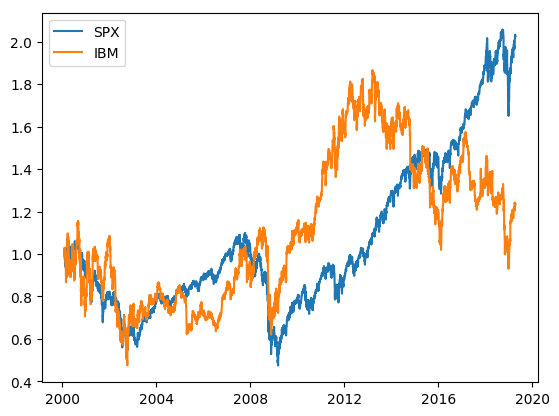

In [5]:
# We read the file
mkt_data = pd.read_excel(PATH + 'MktData.xlsx', index_col = 'Date')

# We normalize the time series so that we can compare them.
mkt_data.SPX = mkt_data.SPX/mkt_data.SPX[0] 
mkt_data.IBM = mkt_data.IBM/mkt_data.IBM[0]

# We plot both time series
plt.plot(mkt_data.index, mkt_data.SPX, label = 'SPX')
plt.plot(mkt_data.index, mkt_data.IBM, label = 'IBM')

plt.legend();

There seems to be some relationship between the 2 series in the $2000-2012$ period. Let's represent the returns of both time series in that period.

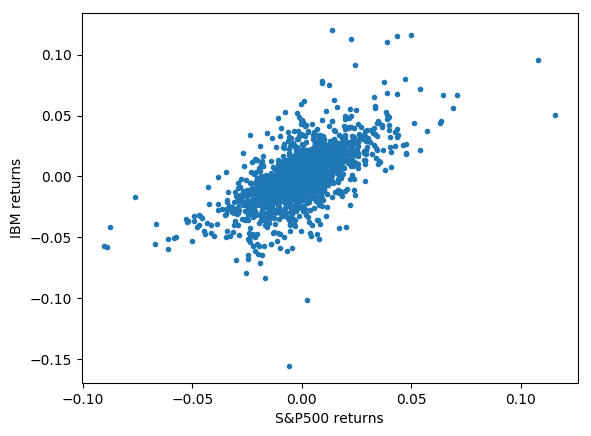

In [6]:
# We do a scatter plot of the one day returns of the 2 series in the 2000-2012 period

plt.plot(mkt_data.SPX.loc['2000':'2012'].pct_change(), mkt_data.IBM.loc['2000':'2012'].pct_change(), '.')

plt.xlabel('S&P500 returns')

plt.ylabel('IBM returns');

## Estimating linear regression coefficients

Let's assume we have $n$ samples and $m-1$ features. We augment the features with a feature $X_0 = 1$, so that we include the bias term. We have the following

$\mathbf{Y}: (n\times 1)$: Variable we want to predict

$\mathbf{\tilde{Y}}: (n\times 1)$: Estimate of $Y$ given $X$ 

$\mathbf{X}: (n\times m)$: Features

$\mathbf{\beta}: (m\times 1)$ Model coefficients

$$\mathbf{\tilde{Y}} = \mathbf{X}\mathbf{\beta}$$

The mean square error is given by

$$\epsilon^2=\frac{1}{n}\sum_{j=1}^n\left(y_j-\tilde{y}_j\right)^2=\frac{1}{n}\left(\mathbf{Y}-\mathbf{X}\mathbf{\beta}\right)^T\left(\mathbf{Y}-\mathbf{X}\mathbf{\beta}\right)$$

If we derive the last equation with respect to $\beta$

$$\frac{\partial{\epsilon^2}}{\partial\beta}=\frac{2}{n}\mathbf{X}^T\left(\mathbf{Y}-\mathbf{X}\mathbf{\beta}\right)$$

And setting it equal to $0$ we obtain the value of $\beta$ that minimizes the mean square error:

$$\beta^*=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y}$$

This equation is called the **normal equation**.

$$\mathbf{X} - Datos iniciales$$ \
$$\mathbf{Y} - Resultados$$

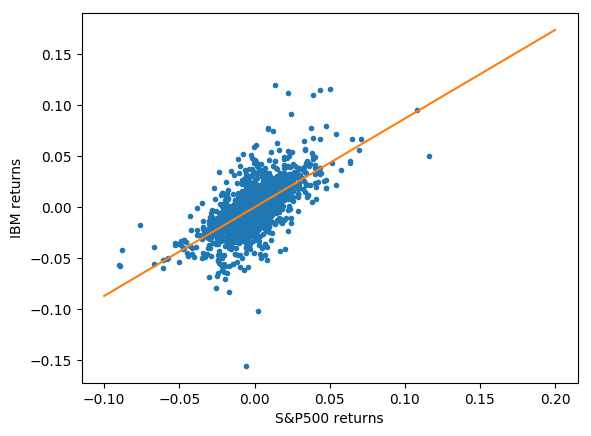

In [7]:
# X is equal to the one day return of the SP time series
X = np.array(mkt_data.SPX.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

# We add a column of 1s to X (will help us to obtain intercept)
X = np.concatenate((np.ones((X.shape[0],1)),X), axis = 1)

# Y is equal to the one day return of the IBM time series
Y = np.array(mkt_data.IBM.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

# We obtain the model params using the normal equation
beta = np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))

# In order to obtain a prediction of our model, we generate a grid in X
X_pred = np.linspace(-0.10, 0.2).reshape(-1,1)

# We add the column of 1s to the grid
X_pred = np.concatenate((np.ones((X_pred.shape[0],1)),X_pred), axis = 1)

# We plot the true values of X and Y
plt.plot(X[:,1],Y, '.')

# We compute our prediction
Y_pred = np.matmul(X_pred, beta)

# We plot our prediction
plt.plot(X_pred[:,1], Y_pred)

plt.xlabel('S&P500 returns')

plt.ylabel('IBM returns');


In [8]:
print('beta_0: ', beta[0,0])
print('beta_1: ', beta[1,0])

beta_0:  0.0001603411483671315
beta_1:  0.8693657375123763


## Linear regression in scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a machine learning library in Python. Its use is widespread and it is very well documented.

Let's see how to run linear regression in scikit-learn.


In [9]:
# We import Sklearn linear regression model
from sklearn.linear_model import LinearRegression

# X and Y now contain the return of both series
X = np.array(mkt_data.SPX.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)
Y = np.array(mkt_data.IBM.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

# We define our model. fit_intercept=True means that we want the model
# to fit the intercept
model = LinearRegression(fit_intercept=True)

# We fit the model to the data
model.fit(X,Y)

# We print the model parameters
print('beta_0: ', model.intercept_[0])
print('beta_1: ', model.coef_[0,0])

beta_0:  0.00016034114836713137
beta_1:  0.8693657375123746


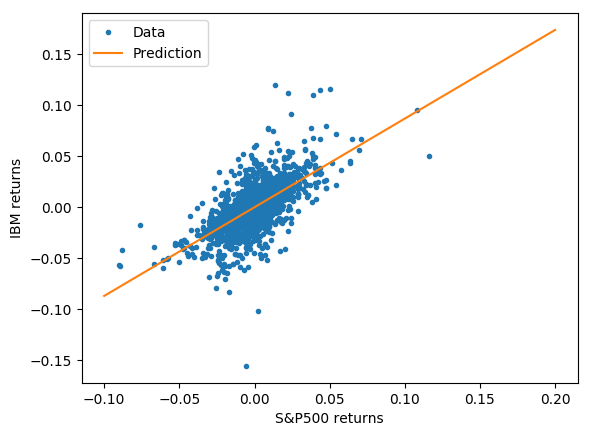

In [10]:
# We define a grid to do a prediction
X_pred = np.linspace(-0.10, 0.2).reshape(-1,1)

# We plot the actual data
plt.plot(X,Y, '.', label = 'Data')

# We obtain the model prediction
Y_pred = model.predict(X_pred)

# We plot the prediction
plt.plot(X_pred, Y_pred, label = 'Prediction')

plt.xlabel('S&P500 returns')

plt.ylabel('IBM returns')

plt.legend();

## Multiple linear regression

Nothing changes when the number of features is multidimensional.

In [0]:
def simulate_mult_regr(num_samples,alpha, beta1, beta2, epsilon, rho):
  
    # Generates X1, X2 pairs randomly (using normal distribution with mean 0 and std dev 1)
    # X1 and X2 are correlated with correlation rho
    # Y is generated as a linear combination of X1 and X2 (with coefficients beta1 and beta2 
    # and intercept alpha) plus noise (also normal) with standard deviation epsilon

    n = num_samples

    # Simulation of X1 and X2
    X1 = np.random.normal(0,1,n)
    X2 = rho*X1 + np.sqrt(1-rho**2)*np.random.normal(0,1,n) # Cholesky

    # Simulation of Y
    Y = alpha + beta1*X1 + beta2*X2 + np.random.normal(0,epsilon,n)

    # X1 and X2 are put together in variable X
    X = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis = 1)

    # The model is fitted to X & Y
    model = LinearRegression(fit_intercept=True)

    model.fit(X,Y)

    # The function plots the model parameters
    print('intercept: ', model.intercept_)
    print('beta 1:', model.coef_[0])
    print('beta 2:', model.coef_[1])

    # And returns X1, X2, Y and the models in a dictionary
    return {'X1': X1, 'X2': X2, 'Y': Y, 'model': model}


In [0]:
def plot_points_predict(simul_results):
  
    # This funtion does a 3D plot of the results obtained
    # by the previous function. simul_results represents
    # the output dictionary. We will use plotly


    # We find the minimum and maximum values of X1 & X2
    x1_min = np.min(simul_results['X1'])
    x1_max = np.max(simul_results['X1'])

    x2_min = np.min(simul_results['X2'])
    x2_max = np.max(simul_results['X2'])

    # We generate a 2D grid of X1 and X2
    X1_Grid = np.linspace(x1_min, x1_max, 50)
    X2_Grid = np.linspace(x2_min, x2_max, 50)
    X1_Grid, X2_Grid = np.meshgrid(X1_Grid, X2_Grid)

    # We initialize the 2D Y prediction of the model
    Y_Grid = np.zeros((50,50))

    # We iterate over the 2D grid of X1 and X2 and obtain the model
    # prediction
    for i in range(50):
        for j in range(50):
            Y_Grid[i,j] = simul_results['model'].predict([[X1_Grid[i,j], X2_Grid[i,j]]])


    # We create the model prediction plot
    lines = []
    line_marker = dict(color='rgb(50, 50, 255)', width=1)
    for i, j, k in zip(X1_Grid, X2_Grid, Y_Grid):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))
    for i, j, k in zip(X1_Grid.T, X2_Grid.T, Y_Grid.T):
        lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

  # We create the 3D scatter plot
    trace1 = go.Scatter3d(
        x=simul_results['X1'],
        y=simul_results['X2'],
        z=simul_results['Y'],
        mode='markers',
        marker=dict(
            size=2,
            color=simul_results['Y'], # set color to an array/list of desired values
            colorscale='Portland',   # choose a colorscale
            opacity=1.0
        )
    )

    lines.append(trace1)

  # We define the layout
    layout2 = go.Layout(
                      scene = dict(
                      xaxis = dict(
                          title='X1', color = 'black'),
                      yaxis = dict(
                          title='X2', color = 'black'),
                      zaxis = dict(
                          title='Y', color = 'black'),),
                      width=700,
                      margin=dict(
                      r=20, b=10,
                      l=10, t=10),
                      showlegend=False,
                    )
  
    enable_plotly_in_cell()

    # We do the plot
    fig = go.Figure(data=lines, layout=layout2)
    iplot(fig, filename='elevations-3d-surface')


Notice that our estimates of regression parameters are accurate if the number of samples is high 

Conocemos los parametros del modelo - son input de la función, por lo tanto si incremento num_samples obtendria parametros intercept (alpha), beta1 y beta2 muy parecidos

In [13]:
results = simulate_mult_regr(num_samples = 5000, alpha = 0.5, beta1 = 0.3, beta2 = -0.3, epsilon = 0.3, rho = 0.5)
plot_points_predict(results)

Output hidden; open in https://colab.research.google.com to view.

Nevertheless, the model is unstable when the correlation of some of its features is high.

This is due to the fact that $\mathbf{X}^T\mathbf{X}$ is a singular matrix for perfectly correlated variables.

We will explore some techniques to overcome this problem.

In [14]:
results = simulate_mult_regr(num_samples = 5000, alpha = 0.5, beta1 = 0.3, beta2 = -0.3, epsilon = 0.3, rho = 0.9999)
plot_points_predict(results)
# En este caso los parametros de regresión bailan, por que X1 tiene corr 1 con X2 al montar el modelo, son linealmente dependientes
# estima pero es erroneo

Output hidden; open in https://colab.research.google.com to view.

# Linear regression for non linear problems

Sometimes the relationship between $X$ and $Y$ is not linear. 

Can we still use linear regression in these problems?

In the following code cell, we simulate $X$ uniformly in the $[0, 2\pi]$ interval. $Y$ is generated as $\sin(X) + \epsilon \phi$, where $\phi \sim N(0,1)$

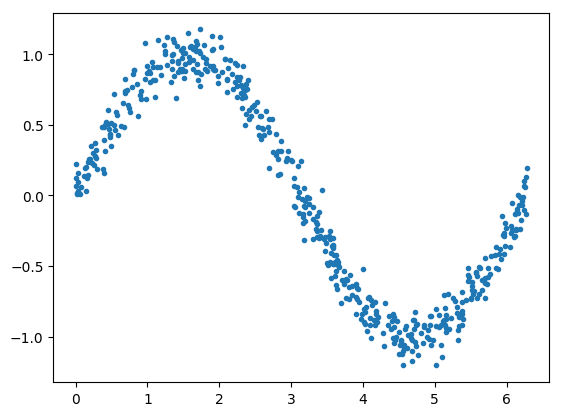

In [15]:
num = 500

X = np.random.uniform(0,2*np.pi, (num,1))

err = 0.1

Y = np.sin(X) + err*np.random.normal(0,1,(num,1))

plt.plot(X,Y, '.');

If we tried to fit a linear model to the data, the model would be highly innacurate.

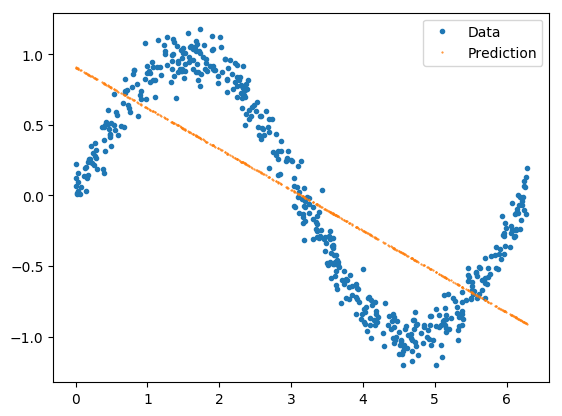

In [16]:
model = LinearRegression(fit_intercept = True)

model.fit(X.reshape(-1,1),Y.reshape(-1,1))

Y_Pred = model.predict(X)

plt.plot(X,Y, '.', label = 'Data')
plt.plot(X,Y_Pred, '.', markersize = 1, label = 'Prediction');

plt.legend();

También se puede utilizar la "normalización" para cualquier problema de optimización.
Es decir, si tenemos una función con dos parametros (uno en orden de millares y otro en orden de $$10^{-7}$$) tengo que normalizar ambos de algún modo por que si no, es muy dificil optimizar. SckitLearn lo incluye en preprocesing

### Feature scaling

In order to reflect the non linear relationship between $X$ and $Y$, we can use powers of $X$ as independent variables (features).  

A question arises: up to what power should be included?

In the following code we simulate 2 sets of $X,Y$ data: a set that we will use to fit the model parameters and a set used to test the error on data not used to train the model.

* The set used to train the model will be called the **train set**.
* The set used to assess the model accuracy on "unseen" data will be called the test set.

Since we augment the feature space by adding powers of $X$, the different features order of magnitude will be very different from each other and so will be their coefficients. This can produce numerical problems. Therefore, we will **normalize the features**. As we will see, **feature normalization** is a standard practice when using some machine learning algorithms. We will use standar scaling (substract mean and divide by standard deviation).

$$\tilde{x}_j^k=\frac{x_j^k-\bar{x}^k}{\sigma^k}$$

$\tilde{x}_j^k$: normalized j-th example of feature k.
$\bar{x}^k$: sample mean of feature k.
$\sigma^k$: sample std deviation of feature k.

Since it is important that we do not use our test data in training, the **scaling parameters should be obtained in the train data**.

In [0]:
# We import mean square error metric from sklearn
from sklearn.metrics import mean_squared_error

# We import scaler of data
from sklearn.preprocessing import StandardScaler

def sin_error(order, num, err, seed):
    # This function does the following:
    #    * Simulates X uniformly in [0,2\pi] (num represents the number of samples)
    #    * Simulates Y as sin(X) plus noise. Noise is normally distributed with std = err
    #    * Augments X with powers of it up to order
    #    * Fits the linear regression model
    #    * Computes the model prediction for a grid of X
    #    * Plots simulated data (train), together with prediction and true relationship
    #    * Computes error in train and test sets
    # seed represents the random seeds so that we can obtain the same results 
  
    # We set random seed
    if seed != -1:
        np.random.seed(seed)

    # Simulate train data
    X_train = np.random.uniform(0,2*np.pi, (num,1))
    Y_train = np.sin(X_train) + err*np.random.normal(0,1,(num,1))

    # Simulate test data
    X_test = np.random.uniform(0,2*np.pi, (num,1))
    Y_test = np.sin(X_test) + err*np.random.normal(0,1,(num,1))

    # Generate grid
    X_grid = np.linspace(0,2*np.pi,500).reshape(-1,1)

    # Initialize variables that will contain augmented data
    X_train_aug = np.zeros((num, order)) 
    X_test_aug = np.zeros((num, order)) 
    X_grid_aug = np.zeros((500, order)) 

    # We fill aug variables with powers of the original data
    for i in range(order):

        X_train_aug[:,i] = np.power(X_train, i+1)[:,0]
        X_test_aug[:,i] = np.power(X_test, i+1)[:,0]
        X_grid_aug[:,i] = np.power(X_grid, i+1)[:,0]
    
    # We declare the standard scaler
    scaler = StandardScaler()
  
    # We fit the scaler to train data (and transform it)
    X_train_aug_scaled = scaler.fit_transform(X_train_aug)

    # We transform test and grid features
    X_test_aug_scaled = scaler.transform(X_test_aug)
    X_grid_aug_scaled = scaler.transform(X_grid_aug)

    # We fit our model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_aug_scaled,Y_train)

    # We predict on the grid data 
    Y_grid_predicted = model.predict(X_grid_aug_scaled)

    # We plot data, prediction and true relationship
    plt.plot(X_train,Y_train, '.', label = 'Data')
    plt.plot(X_grid,Y_grid_predicted,'r', label = 'Model prediction');
    plt.plot(X_grid,np.sin(X_grid),'green', label = 'True relationship')

    plt.ylim(-1.2,1.2)
    plt.legend()
  
    # We return train and test errors
    return {'error train' : np.sqrt(mean_squared_error(Y_train, model.predict(X_train_aug_scaled))),
                                'error test' : np.sqrt(mean_squared_error(Y_test, model.predict(X_test_aug_scaled)))}

  

### Bayes error

Notice that when the order is low, the model is innacurate. Notice the high error in both train and test compared with the true error.

The unavoidable error in our data is called **Bayes error** and is a theoretical concept that is unkown in nearly every real problem.

In some applications, the error obtained by humans is used as a proxy for Bayes error.



# Bias - variance



## Bias:

When the order is low (simple model), the model does not depend too much on the data, but the prediction is far away from the true relationship. 

Both error on train and test are far away from Bayes error.

This situation is called bias.

El modelo es malo por simpleza y el tener mas datos no ayuda a que mejore el modelo

{'error test': 0.5959481659176626, 'error train': 0.522979827453276}

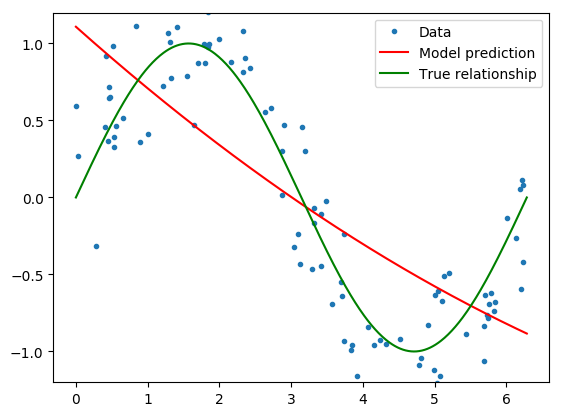

In [18]:
sin_error(order=2, num = 100, err = 0.3, seed = -1)

Under this circumstance, having more data does not help at all.

In this case, adding complexity to our model (more features or a more complex model) could improve the model performance.

{'error test': 0.537261505862751, 'error train': 0.5369263092102784}

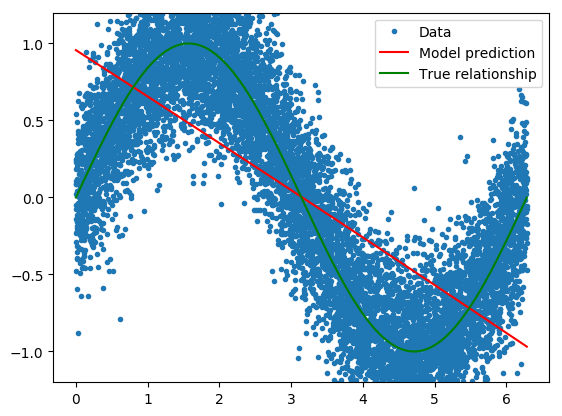

In [19]:
sin_error(order=2, num = 10000, err = 0.3, seed = -1)
# Mas datos no mejoran

## Variance

When the order is high, the model seems unstable. 

Train error is low compared to test error and could be lower than Bayes error. This situation is called variance (overfit)

Modelo excesivamente complejo 

{'error test': 0.45343765653697315, 'error train': 0.2415336019469228}

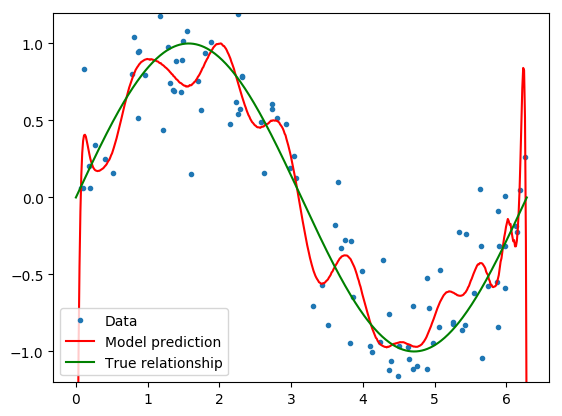

In [20]:
sin_error(order=30, num = 100, err = 0.3, seed = -1)

{'error test': 0.3030204095207801, 'error train': 0.2950868218659864}

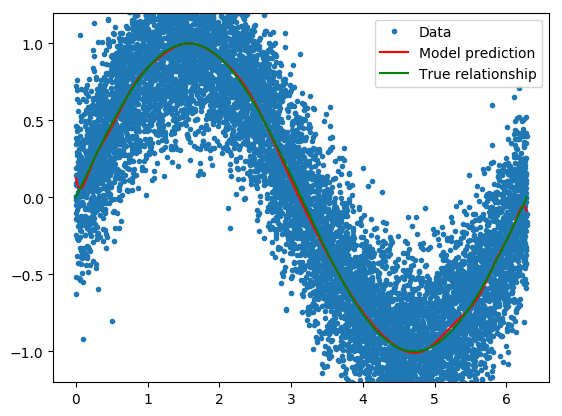

In [21]:
sin_error(order=30, num = 10000, err = 0.3, seed = -1)

One solution could be to try a simpler model (less features, simpler model)

{'error test': 0.3284131976740292, 'error train': 0.26361202475857104}

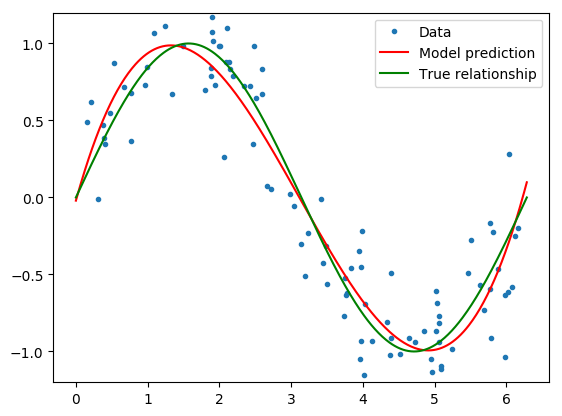

In [22]:
sin_error(order=3, num = 100, err = 0.3, seed = -1)

Or to get more data

{'error test': 0.29835495618704017, 'error train': 0.30157205375263335}

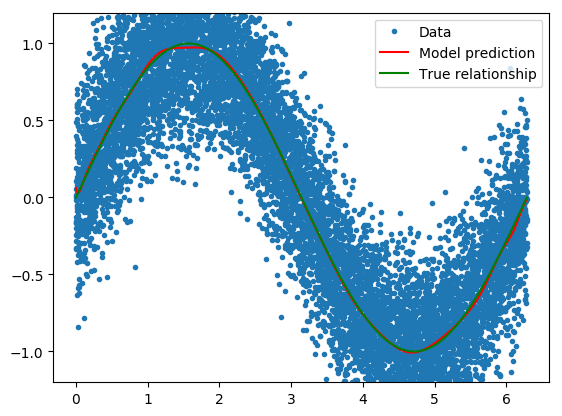

In [23]:
sin_error(order=30, num = 10000, err = 0.3, seed = -1) # Este modelo sería mejor pero por que tienes muchos datos

Por lo tanto, el optimo del modelo es aquel que se adapta mejor a los datos que tenemos

## Bias-variance tradeoff

Simple models tend to suffer from bias (not reflect the true relationship) and complex models tend to suffer from variance (overfit to training data and not generalize properly to unseen data).

Notice that whether a model suffers from variance or bias depend on:

* **The problem being analyzed**
* **The model being used**
* **The amount of data available**

## Transformers, estimators and pipelines in sklearn

In the problem we are working on, we are doing the following:

* We augment the raw input X to include its powers (**transform**).
* We normalize these powers (**transform**).
* We fit a multivariate linear regression (**estimator**).

That is, we do (in sequence) two transformations and one estimation. Notice that the first transformation step has a model hyperparameter (order of polynomial).

In sklearn we have built in [transformers](https://scikit-learn.org/stable/modules/preprocessing.html).

If we want to use a sequence of transformers and a final model as if it was a single model, we can use [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). As we will see, this will save us a lot of code.


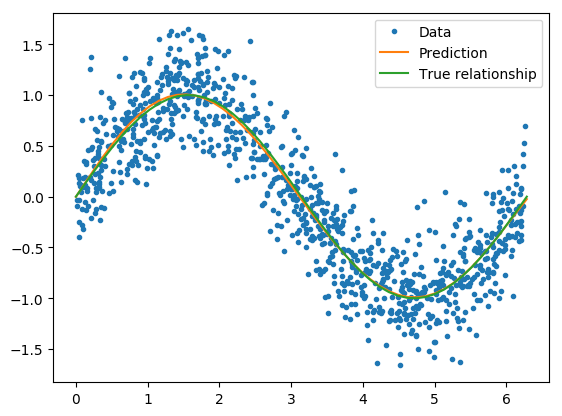

In [24]:
# To chain transformers and estimator
from sklearn.pipeline import Pipeline

# PolynomialFeatures will compute the powers of X
from sklearn.preprocessing import PolynomialFeatures

# Number of samples
num = 1000 
# error
err = 0.3
# Random number generator seed
seed = -1
# Degree of polynomial regression
degree = 5

# Set random seed
if seed != -1:
    np.random.seed(seed)

# Simulate the data
X = np.random.uniform(0,2*np.pi, (num,1))
Y = np.sin(X) + err*np.random.normal(0,1,(num,1))

# We define the steps as a dictionary 
steps = [('Transfor_X_to_Powers', PolynomialFeatures(degree=degree)),
         ('scaler', StandardScaler()), # Por los distintos ordenes de magnitud
         ('Regression', LinearRegression(fit_intercept=False))]

# Pipeline is defined
pipeline = Pipeline(steps) # Esto es un modelo

# We use the pipeline as if it was a standard model
pipeline.fit(X,Y) # Fittea el modelo, pasa las X por el pipeline y los transforma, escala y aplica la regresión

# Grid of X to predict
X_grid = np.linspace(0,2*np.pi,50).reshape(-1,1)

# Plot
plt.plot(X,Y, '.', label = 'Data')
plt.plot(X_grid, pipeline.predict(X_grid), label = 'Prediction')
plt.plot(X_grid, np.sin(X_grid), label = 'True relationship')
plt.legend();

# Cross validation

In most real applications data is scarce. However, we need to find the best model for our data.

## Train, validation, test split

The idea is splitting the data into 3 different sets:

* **Train set**: Will be used to find different model parameters (i.e. linear regression coefficients).
* **Cross-validation set**: Once a model has been fitted to the train set, we will see its performance on the cross validation set. This will help us decide among different models or model hyperparameters (i.e. order of polinomial regression).
* **Test set**: Notice that the model hyperparameters are optimized using the cross validation set, therefore the accurary on the cross validation set of the best model found will be lower that that obtained in data not included in the model selection process. Therefore the test set will be used to assess the model performance (accuracy).

The train set could contain 80% of the data and the cross-validation and test sets 10% of the data each.

Notice that it is very important that the split is done randomly.

If we had both real data and synthetic data (data generated artificially), we should include a portion of real data in train and all synthetic data in train. Cross validation and test should just be comprised of real data.

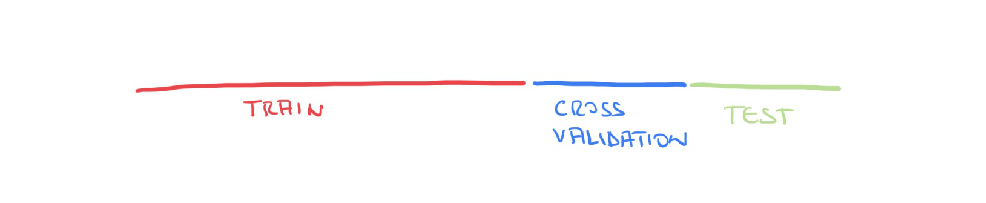

In [25]:
#@title train_test
plot_image(PATH + 'train_valid.jpg', 12, 12)

La idea del Train-CrosValidation-Test (70/15/15) es

Train: Entreno el modelo \
    Genero un subconjunto de los datos y le aplico el modelo con cada hiperparametro (parametros que son inputs - en el caso de la regresion el grado del polinomio, pero pueden ser incluso el tipo de modelo utilizado)

Cross Validation: Veo el modelo que tiene el menor error\
    Pruebo los coeficientes obtenidos en el modelo (para cada hiperparametro)  en el set CrossValidation (que el modelo no ha visto es diferente al subconjunto del Train) y veo como predice cada uno de ellos (será mayor que el error bayesiano, en nuestro ejemplo esta siendo 0.3)
    
Test: Uso los datos de train y crossvalidation para recalibrar el modelo, que ha sido elegido en la fase de cross validation y veo cual es el error al aplicarle la nueva calibración del mejor modelo sobre Test 

Antes de poder utilizar del todo el modelo, es necesario recalibrar ese mejor modelo usando todo el data set 

Hay que guardar datos reales (en caso de tenerlos) para incluirlos en CrossValidation y en Test


## Grid search

Given a model (i.e. polynomial regression) and a set of hyperparameters (i.e. degree of polynomial), we define a grid of values for the different hyperparameters.

For each element in the h dimensional grid (h being the number of hyperparameters):
* We find the model parameters using the train set.
* We compute the model performance on the cross validation set.

To compute the model performance, a score must be used. [Sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html) provides us with the most widely used. Customized scores can also be used.

In linear regression, the most typical are $r^2$ and mean squared error.

Fitting 1 folds for each of 29 candidates, totalling 29 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.2s finished


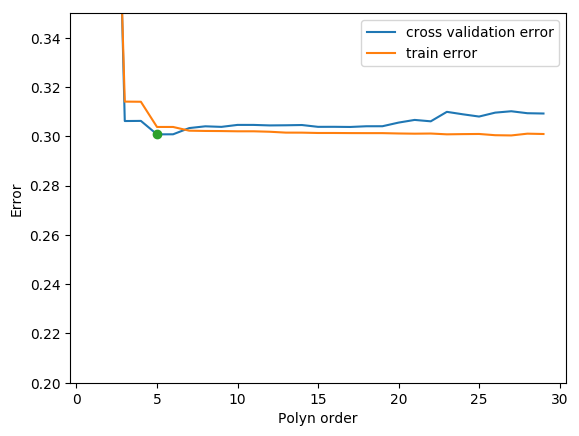

In [26]:
# To force train / cross validation
from sklearn.model_selection import PredefinedSplit

# To perform a grid search
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle


# Number of samples
num = 1000 
# error
err = 0.3
# Random number generator seed
seed = 12345
# Degree of polynomial regression
degree = 5

# Set random seed
if seed != -1:
    np.random.seed(seed)

# Simulate the data
X = np.random.uniform(0,2*np.pi, (num,1))
Y = np.sin(X) + err*np.random.normal(0,1,(num,1))

np.random.seed()
X, Y = shuffle(X,Y) # Esto "desordena" los datos, por lo que el train-cv subconjunto es cada vez distinto

# We build a vector with the same length as X.
# For each element of X, we indicate to what cross validation set
# we want the element to belong to. If we add a -1 to an element,
# it means that it will not belong to any of them. This is what
# we want to do for the elements to be part of the train set.
test_fold = [(lambda x: 0 if x/len(X) < 0.2 else -1)(x) for x in range(len(X))]
ps = PredefinedSplit(test_fold)


# We define the steps of the pipeline 
steps = [('Transfor_X_to_Powers', PolynomialFeatures()),
         ('scaler', StandardScaler()), 
         ('Regression', LinearRegression(fit_intercept=False))]

# Pipeline is defined
pipeline = Pipeline(steps) # Es el modelo


# Grid of hyperparams
parameteres = {'Transfor_X_to_Powers__degree': range(1,30)}

# Grid search is defined # Con esto entrenaras 29 modelos para cada elemento de parameters dentro de 'Transfor_X'
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=ps, verbose = 1, refit=True, scoring= 'neg_mean_squared_error',
                   return_train_score = True) # refit = True - Utiliza el mejor modelo, con el mejor hiperparametro para ajustarlo a todos los datos de Train y CV

# We use the grid as if it was a model, por que hemos hecho refit = True
grid.fit(X,Y);

# We plot the score bor both train and test
plt.plot(range(1,30), np.sqrt(-grid.cv_results_['mean_test_score']), label = 'cross validation error')
plt.plot(range(1,30), np.sqrt(-grid.cv_results_['mean_train_score']), label = 'train error')

# We plot the best model
plt.plot(grid.best_params_['Transfor_X_to_Powers__degree'], np.sqrt(-grid.best_score_),'o')

plt.xlabel('Polyn order')
plt.ylabel('Error')

plt.legend()

plt.ylim(0.2, 0.35); 


Se puede observar:

En Train - Mientras mayor sea el grado del polinomio mejor sería (por que tiene pendiente negativa el grafico) \
En Cross Validation - Eso no se refleja \

El optimo es el punto verde

Pero podemos ver que al rejecutar la linea, como la seleccion de train-cv es aleatoria, el comportamiento no es bueno. Hay que hacer una selección "logica"

As can be seen in the previous example, the result is quite volatile:

* Optimum hyperparameter is dependent on the data.
* Test error is sometimes smaller than test error.

The result is heavily dependent on the actual test / train split.

## K-fold cross validation

The idea is to divide the data into two sets: train-cross validation and test.

The train-cross validation set is divided in K folds.

We run k fits. On each of these, k-1 folds are used to train and the fold not used to train is used to obtain the model score.

The average score is obtained:

$$\bar{SC}=\frac{1}{k}\sum_{j=1}^kSC_j$$

The best model found is then trained using the train-cross validation set and the model performance on test is used as an estimate of the model error.

Finally, the best model is fitted to all the data available and put in production.

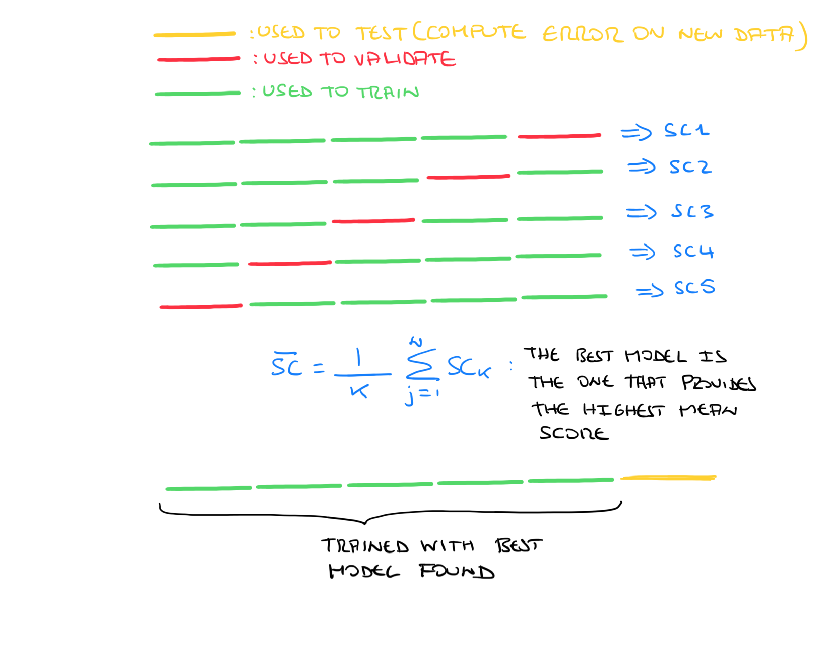

In [27]:
#@title K-Fold
plot_image(PATH + 'k_fold.PNG', 12,8)

Used to validate - Cross Validation \
Los amarillos - Test (tenemos que intentar que haya una buena carga de datos reales) \

K-Fold (ejemplo k = 5)

Divido el subconjunto de train y cv en 5 y hago un ajuste del modelo, repito este ejercicio 5 veces (para cada hiperparametro hago 5 ejercicios y me apunto el error promedio que tendría en los datos de cv)

Esto sirve para reducir el efecto de la seleccion de los subconjuntos de train y cv sobre el resultado final

Esto es mas costoso por que realizo k-veces para cada hiperparametro

Si usas datos historicos, el K-fold no tiene sentido, por que no tendria sentido ver como se predice para el año 2012 con los datos de 2013 y 2014 (ejemplo) \
Lo que habria que hacer:

train (2012) cv(2013)
train(2012, 2013) cv(2014)
train(2012, 2013, 2014) cv(2014)...

Fitting 10 folds for each of 29 candidates, totalling 290 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 290 out of 290 | elapsed:    3.9s finished


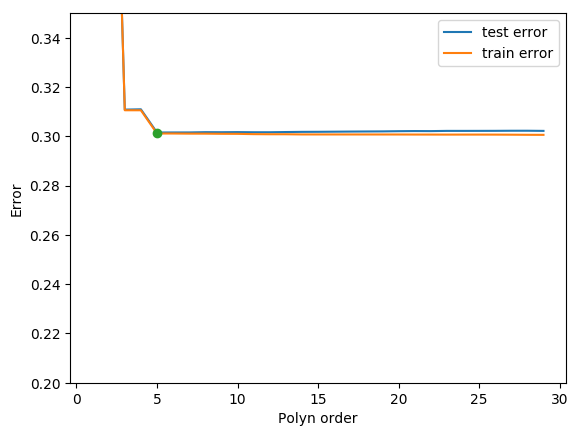

In [28]:

# Number of samples
num = 5000 
# error
err = 0.3
# Random number generator seed
seed = 12345
# Degree of polynomial regression
degree = 5

# Set random seed
if seed != -1:
    np.random.seed(seed)

# Simulate the data
X = np.random.uniform(0,2*np.pi, (num,1))
Y = np.sin(X) + err*np.random.normal(0,1,(num,1))

np.random.seed()
X, Y = shuffle(X,Y)

# We define the steps of the pipeline 
steps = [('Transfor_X_to_Powers', PolynomialFeatures()),('scaler', StandardScaler()), 
           ('Regression', LinearRegression(fit_intercept=False))]

# Pipeline is defined
pipeline = Pipeline(steps)


# Grid of hyperparams
parameteres = {'Transfor_X_to_Powers__degree': range(1,30)}

# Grid search is defined. Here we do 10-fold cv
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=10, verbose = 1, refit=True, scoring= 'neg_mean_squared_error',
                   return_train_score = True) # cv = k - K-fold de 10 - Por lo tanto repite 10 veces la prueba para caada hiperparametro

# We use the grid as if it was a model
grid.fit(X,Y);

# We plot the score bor both train and test
plt.plot(range(1,30), np.sqrt(-grid.cv_results_['mean_test_score']), label = 'test error')
plt.plot(range(1,30), np.sqrt(-grid.cv_results_['mean_train_score']), label = 'train error')

# We plot the best model
plt.plot(grid.best_params_['Transfor_X_to_Powers__degree'], np.sqrt(-grid.best_score_),'o')

plt.xlabel('Polyn order')
plt.ylabel('Error')

plt.legend()

plt.ylim(0.2, 0.35); 


Al haber incluido el K-Fold, el resultado es mas estable

As can be seen in the previous example, the result is less volatile:

* Optimum hyperparameter is less dependent on the data.
* Test error is usually larger than test error.

The result is less dependent on the actual test / train split.

K-fold cross validation is computationally expensive. 5-10 folds are usually chosen.

Leave one out cross validation is a special case of cross validation where k is equal to the number of samples.

# Feature selection

When the number of features $p$ is greater than or equal to the number of examples $n$, the normal equation has no solution (well, an infinite number of them). Just think that if $p=2$ and $n=2$, there are $\infty$ planes that contain the 2 examples.

Even when $p<n$, but $n$ is not much larger than $p$, there can be a lot of variability in the fit (overfitting).

This situation can also appear when there is a high correlation among some of the features.

Furthermore, when the number of features is large, the model interpretability is reduced.

Under these circumstances, we face **variance**. We need to, somehow, simplify our model.

One way to do so is to reduce the number of features.

Features son las X (los predictores - los datos que usas para predecir)

## Best subset selection: 
(No es muy util - solo funcion cuando hay pocos elementos)
* For $k=1,\ldots,p$:

  * Fit all ${p}\choose{k}$ models containing $k$ features.
  * Choose the model with the greatest train accuracy (smallest mean squared error or largest $r^2$). Let's call this model $M_k$
  
* Select the best model among $M_1,\ldots,M_p$ through cross validation.

Notice that since we are training $2^p$ different models, the approach can be prohibitive. Furthermore, in the first step we might be choosing models that perform well in train, but not in test.

## Forward stepwise selection:
(Va probando añadiendo una X - feature mas, y lo prueba y asi va avanzando, no es la mejor opción tampoco - al igual que la Backward)
* We start by a null model $M_0$ which contains no features.

* For $k=0,\ldots,p-1$:

  * Consider all $p-k$ models that add one predictor to $M_k$.
  * Among these, chose the one with the greatest accuracy in train (smallest mean squared error or largest $r^2$) and call it $M_{k+1}$
  
* Select the best model among $M_1,\ldots,M_p$ through cross validation. 

This method implies fitting $1 + \frac{p(p+1)}{2}$ models.
  
  

## Backward stepwise selection:

* We start by a full model $M_p$ which all features.

* For $k=p,\ldots,1$:

  * Consider all $p$ models that subtract one predictor to $M_k$.
  * Among these, chose the one with the greatest accuracy in train (smallest mean squared error or largest $r^2$) and call it $M_{k-1}$
  
* Select the best model among $M_1,\ldots,M_p$ through cross validation. 

This method implies fitting $1 + \frac{p(p+1)}{2}$ models.

# Ridge regression

En este caso, el error (que seria el error cuadratico medio $\frac{1}{n}\sum_{j=1}^n\left(y_j-\tilde{y}_j\right)^2 $), en el train con $\lambda$ pequeños tendre el error mas bajo, e ira creciendo. Mientras que en validation (datos que no ha utilizado el modelo para calibrarse) comprime, mas rapido los features menos utiles, y el error será maximo al inicio, para bajar y luego, si el modelo es malo, volvera a subir - Sirve para ir eliminando variable explicativas que no sean utiles, buscando el lambda optimo que minimice en el validation. Lo que hace en el fondo es sumar la media de las betas al cuadrado, la funcion $J(\beta)$ es la que se va a minimizar. Se optimiza sobre la $\beta$

Si $\lambda$ es muy alto, acabo teniendo, al minimizar, solo el $\beta_{0}$.

Ridge regression (also known as regularized linear regression) is similar to least squares, but the cost function is slightly different:


$$J(\beta)=\frac{1}{n}\sum_{j=1}^n\left(y_j-\tilde{y}_j\right)^2 + \frac{\lambda}{n}\sum_{j=1}^p\beta_j^2$$

Empieza en j = 1 por que así al minimizar, queda como minimo, el peor modelo, que obtendriamos, es el dado por $\beta_{0}$ que sería el valor esperado del modelo. Todo esto despues de haber normalizado los features (X), es decir el modelo quedaría como $y = \beta_{0}$.

The term $\frac{\lambda}{n}\sum_{j=1}^p\beta_j^2$ is called regularization term and $\lambda$ the regularization parameter. The intercept (bias term) $\beta_0$ is usually excluded from the regularization term.

The regularization term penalizes large coefficients. If $\lambda \to 0$ leads to standard linear regression, whereas $\lambda \to \infty$ leads to smoother models.

In models with a large number of features  $\lambda \to 0$ leads to **variance** whereas $\lambda \to \infty$ leads to **bias**.

Same as with linear regression, the model has a closed form formula for its parameters.

The cost function can be written in matrix form:

$$J(\beta)=\frac{1}{n}\left(\mathbf{Y}-\mathbf{X}\mathbf{\beta}\right)^T\left(\mathbf{Y}-\mathbf{X}\mathbf{\beta}\right) + \frac{\lambda}{n}\beta^T\beta$$

So that the gradient of the cost function with respect to $\beta$ is given by

$$\frac{\partial J(\beta)}{\partial \beta} = \frac{2}{n}\left(\mathbf{X}^T\left(Y-X\beta\right)+\lambda\beta\right)$$

And setting the gradient equal to 0, we get the model params:

$$\beta^*=\left(\mathbf{X}^T\mathbf{X}+\Lambda^TI\right)^{-1}\mathbf{X}^T\mathbf{Y}$$

Where $\Lambda$ is a $(m+1)\times 1$ matrix with $\lambda$ in every element but the one corresponding with the bias term, where it holds a $0$.

Contrary to what happens with $\mathbf{X}^T\mathbf{X}$,  where the matrix has no inverse if some features are perfectly correlated or when the number of features is greater than the number of examples, the matrix  $\mathbf{X}^T\mathbf{X}+\Lambda^TI$ is always non singular. 

This method is used when the number of features is considerable. $\lambda$ is a hyperparameter whose optimal value is found through cross-validation.

Notice that if the values of the different features are of different orders of magnitude, features with greater values will tend to have smaller coefficients, whereas features with smaller values will have greater coefficients. Since we do not want to penalize coefficients associated to features with smaller values irrespective of their predictive power, **when regularization techniques are applied, it is fundamental that features are scaled**.


beta_0:  0.00019473293746679568
beta_1:  0.32263333998837496


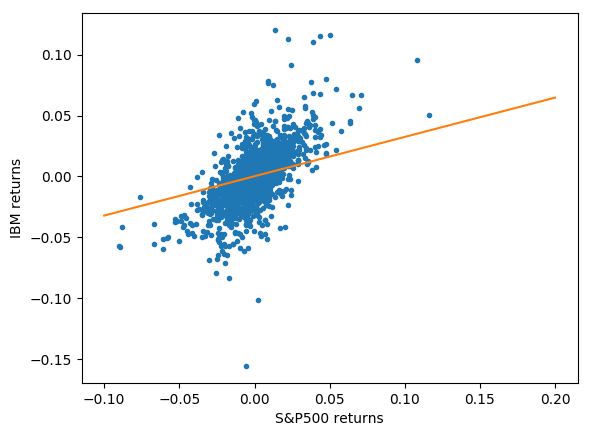

In [31]:
# X is equal to the one day return of the SP time series
X = np.array(mkt_data.SPX.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

# We add a column of 1s to X (will help us to obtain intercept)
X = np.concatenate((np.ones((X.shape[0],1)),X), axis = 1)

#lamb = 100 # Podemos ver que la linea tiene la pte dada por el beta_0 por que los valores de beta_i están muy penalizados 100*1/n*Sum(beta_i)
lamb = 1 #

I = np.identity(2)
I[0,0] = 0

# Y is equal to the one day return of the IBM time series
Y = np.array(mkt_data.IBM.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

# We obtain the model params using the normal equation
beta = np.matmul(np.linalg.inv(np.matmul(X.T,X)+lamb*I),np.matmul(X.T,Y))

# In order to obtain a prediction of our model, we generate a grid in X
X_pred = np.linspace(-0.10, 0.2).reshape(-1,1)

# We add the column of 1s to the grid
X_pred = np.concatenate((np.ones((X_pred.shape[0],1)),X_pred), axis = 1)

# We plot the true values of X and Y
plt.plot(X[:,1],Y, '.')

# We compute our prediction
Y_pred = np.matmul(X_pred, beta)

# We plot our prediction
plt.plot(X_pred[:,1], Y_pred)

plt.xlabel('S&P500 returns')

plt.ylabel('IBM returns');

print('beta_0: ', beta[0,0])
print('beta_1: ', beta[1,0])

## Ridge regression in Scikit-learn

In [32]:
# We import Sklearn linear regression model
from sklearn.linear_model import Ridge

# X and Y now contain the return of both series
X = np.array(mkt_data.SPX.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)
Y = np.array(mkt_data.IBM.loc['2000':'2012'].pct_change()[1:]).reshape(-1,1)

alpha = 1 # Este sería el lambda de la función a minimizar

# We define our model. fit_intercept=True means that we want the model
# to fit the intercept
model = Ridge(fit_intercept=True, alpha = alpha)

# We fit the model to the data
model.fit(X,Y)

# We print the model parameters
print('beta_0: ', model.intercept_[0])
print('beta_1: ', model.coef_[0,0])

beta_0:  0.00019473293746679547
beta_1:  0.322633339988375


## Cross validation with Scikit-learn

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.9s finished


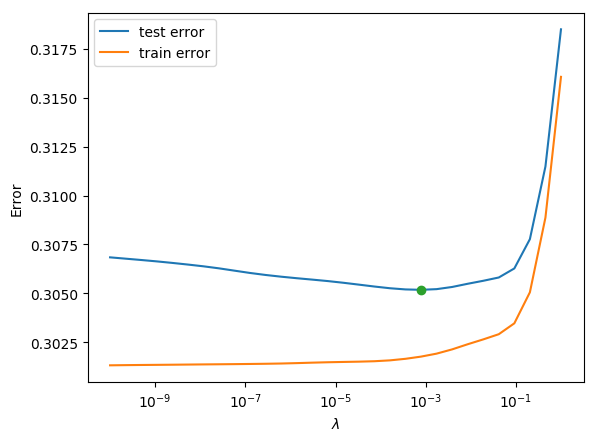

In [33]:
# Number of samples
num = 1000 
# error
err = 0.3
# Random number generator seed
seed = 12345
# Degree of polynomial regression
degree = 5

# Set random seed
if seed != -1:
  np.random.seed(seed)

# Simulate the data
X = np.random.uniform(0,2*np.pi, (num,1))
Y = np.sin(X) + err*np.random.normal(0,1,(num,1))

np.random.seed()
X, Y = shuffle(X,Y)

# We define the steps of the pipeline 
steps = [('Transfor_X_to_Powers', PolynomialFeatures(degree = 30)),('scaler', StandardScaler()), 
           ('Ridge', Ridge(fit_intercept=True))]

# Pipeline is defined
pipeline = Pipeline(steps)


# Grid of hyperparams
parameteres = {'Ridge__alpha': np.logspace(-10,0,30)} # Los hiperparametros son el lambda

# Grid search is defined. Here we do 10-fold cv
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=10, verbose = 1, refit=True, scoring= 'neg_mean_squared_error',
                   return_train_score = True) # Cross validation sobre el lambda, con refit = T (lo que da un modelo final)

# We use the grid as if it was a model
grid.fit(X,Y);

# We plot the score bor both train and test
plt.plot(np.logspace(-10,0,30), np.sqrt(-grid.cv_results_['mean_test_score']), label = 'test error')
plt.plot(np.logspace(-10,0,30), np.sqrt(-grid.cv_results_['mean_train_score']), label = 'train error')

# We plot the best model
plt.plot(grid.best_params_['Ridge__alpha'], np.sqrt(-grid.best_score_),'o')

plt.xlabel(r'$\lambda$')
plt.ylabel('Error')

plt.xscale('log')

plt.legend();

#plt.ylim(0.2, 0.35); 


El error que nosotros estamos utilizando para simular es 0.03.

La parte inicial es error por Variance (sobreajuste), mientras que la parte final, despues del optimo, es el error generado por el Bias (exceso de simplicidad del modelo). Lo ideal es buscar un compromiso entre ambos.

En este caso, el $\lambda$ optimo es $\lambda = 10^{-3}$

In [0]:
plt.plot(X,Y, '.')
plt.plot(X_grid, grid.predict(X_grid));
plt.plot(X_grid, np.sin(X_grid));


# Financial application: Longstaff Schwarz

The [Longstaff - Schwartz](https://people.math.ethz.ch/~hjfurrer/teaching/LongstaffSchwartzAmericanOptionsLeastSquareMonteCarlo.pdf) technique is a method to value early exercise options (american / bermudan options) for high dimensional problems.

In low dimensions (1-2) trees or numerical solution of partial differential equations are used, but these are computationally prohibitive for higher dimensions, where the Montecarlo technique is used. The problem with the Montecarlo technique and early exercise options lies in the fact that the continuation value (value of the derivative conditional on not exercising the option) is unkown.

Under the Longstaff - Schwartz method, for each option date (backwards) the continuation  value is estimated with the help of a linear regression model. For this model:

* $Y_T$ is comprised of the present value of the future cash flows (cash flows after $T$) for each simulation.
* $X_T$ is comprised of different magnitudes at time $T$ (swap rates, spot prices, model processes).

The regression-based continuation value is used to determine if the option is exercise on that particular option date and the cashflows are corrected accordingly.


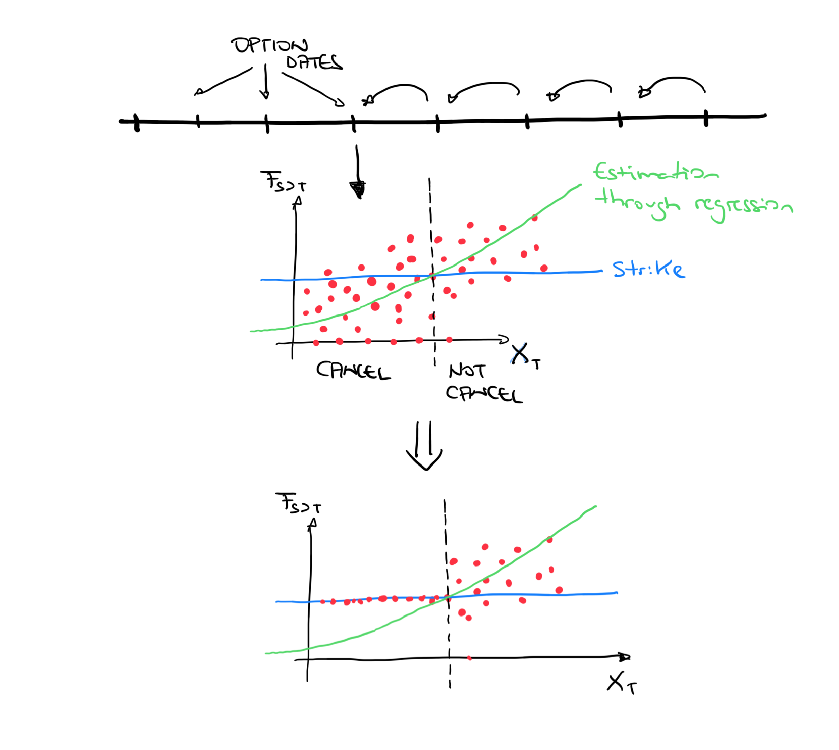

In [34]:
#@title Longstaff-Schwartz
plot_image(PATH+'Longstaff.PNG', 10,10)

Although it was designed to be used in high dimensions, we will use it in a one dimensional problem where we use a high order polynomial regression with regularization. We will perform cross validation to find the best hyper parameter $\lambda$ (regularization parameter).

We simulate the spot.

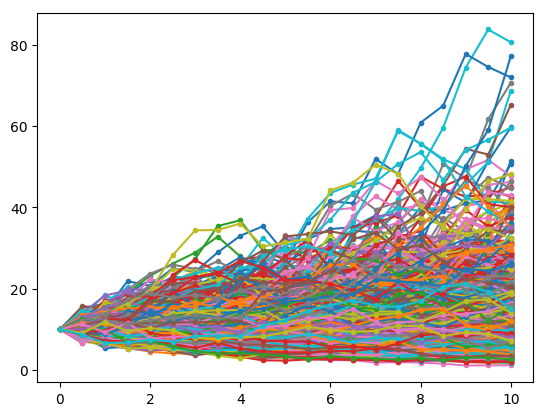

In [35]:
# Simulation of spot

rfr = 0.03 # Risk free rate
div = 0.0 # Dividends

vol = 0.2 # Volatility
spot = 10 # Spot t=0

opt_times = np.linspace(0.5,10,20, True) # Option times

sims_train = 20000 # Sims used to train

sims_test = 20000 # Sims used to value the product

# We will simulate the spot on every option date.
# We compute the time length for every interval
delta_T = np.diff(np.array([0] + list(opt_times)), n = 1)

# We simulate the brownian paths
W = np.random.normal(0,1,(sims_train + sims_test, len(opt_times)))* np.sqrt(delta_T)

# We compute the log normal returns
returns = np.exp((rfr-0.5*vol*vol-div)*delta_T + vol* W)


S = np.concatenate((spot*np.ones((sims_train  + sims_test,1)),returns), axis = 1)
S = np.cumprod(S, axis = 1)

# We plot the first 1000 paths
plt.plot(np.concatenate(([0], opt_times)), S[0:1000,:].T, '.-');

In [0]:
def FitOptDate(rfr, S_train, Payoff_train, opt_times, opt_index, payoff_functor, polin_order, ridge_params, ax, camera):
  
    # It fits the regression for a given option date

    # rfr: risk free rate
    # S_train: spot price matrix (rows: paths, cols: option dates + spot date).
    # Payoff_train: payoff matrix (rows: paths, cols: option dates)
    # opt_times: array of time of option dates
    # opt_index: index of option to solve
    # payoff_functor: payoff functor
    # polin_order: degree of polynomial regression
    # ridge_params: grid of ridge params


    print('Fitting option date ' + str(opt_index+1))

    # We compute the discount factor from the option date being considered 
    # to future option dates
    disc_factor = np.exp(-rfr*(opt_times[opt_index+1:]-opt_times[opt_index]))

    # We compute Y: sum of future discounted cash flows
    Y = np.sum(Payoff_train[:,opt_index+1:]*disc_factor, axis = 1)

    # pipeline steps
    steps = [('Transfor_X_to_Powers', PolynomialFeatures(degree = polin_order)),('scaler', StandardScaler()), 
           ('Ridge', Ridge(fit_intercept=True, max_iter=500))]

    pipeline = Pipeline(steps)

    # Grid search performed on Ridge regression ridge param
    parameteres = {'Ridge__alpha':ridge_params}

    # 10 fold cv
    grid = GridSearchCV(pipeline, param_grid=parameteres, cv=10, verbose = 0, refit=True)

    # We compute instrinsic value
    intrinsic_value = payoff_functor(S_train[:,opt_index + 1])

    # We consider in the modey paths (ITM) to run the regression
    X = S_train[np.greater(intrinsic_value,0),opt_index + 1].reshape(-1,1)
    Y_ITM = Y[np.greater(intrinsic_value,0)]

    # We fit the model             
    grid.fit(X, Y_ITM)

    # Estimate the continuation value
    continuation_value = grid.predict(X)
    intrinsic_value_ITM = payoff(X.reshape(-1))

    if not ax.lines:

        ax.plot(X, Y_ITM, '.', markersize = 1, label = 'All paths', color = 'blue')
        ax.plot(X[np.greater(intrinsic_value_ITM,continuation_value)], 
                 Y_ITM[np.greater(intrinsic_value_ITM,continuation_value)], '.', markersize = 1, label = 'Early ex. paths', color = 'green')
        ax.plot(X, intrinsic_value_ITM, '.', markersize = 1, label ='Intrinsic value', color = 'black')
        ax.plot(X, continuation_value, '.', markersize = 1, label ='Continuation value', color = 'red')
    
    else:

        ax.plot(X, Y_ITM, '.', markersize = 1, color = 'blue')
        ax.plot(X[np.greater(intrinsic_value_ITM,continuation_value)], 
                 Y_ITM[np.greater(intrinsic_value_ITM,continuation_value)], '.', markersize = 1, color = 'green')
        ax.plot(X, intrinsic_value_ITM, '.', markersize = 1, color = 'black')
        ax.plot(X, continuation_value, '.', markersize = 1, color = 'red')
    
    ax.legend()

    ax.text(0.4, 0.9, 'Option date # ' + str(opt_index+1), horizontalalignment='center',
            verticalalignment='center', transform=ax.transAxes)
  
    camera.snap()
    return grid

  

In [0]:
def Update_Payoff(S_train, Payoff_train, opt_index, payoff, regr_model):
  
    intrinsic = payoff(S_train[:,opt_index + 1])
    cont_value = regr_model.predict(S_train[:,opt_index + 1].reshape(-1,1))

    index_in_the_money = np.greater(intrinsic,0)

    index_exercise = np.logical_and(np.greater(intrinsic,0), np.greater(intrinsic,cont_value))

    Payoff_train[index_exercise, opt_index] = intrinsic[index_exercise]

    Payoff_train[index_exercise, opt_index+1:] = 0

    disc_factor = np.exp(-rfr*(opt_times[opt_index:]-opt_times[opt_index]))

    Y = np.sum(Payoff_train[:,opt_index:]*disc_factor, axis = 1)
  
#   plt.clf()
#   plt.plot(S_train[:,opt_index + 1][index_in_the_money], Y[index_in_the_money], '.', markersize=1)
#   plt.show()

Fitting option date 1


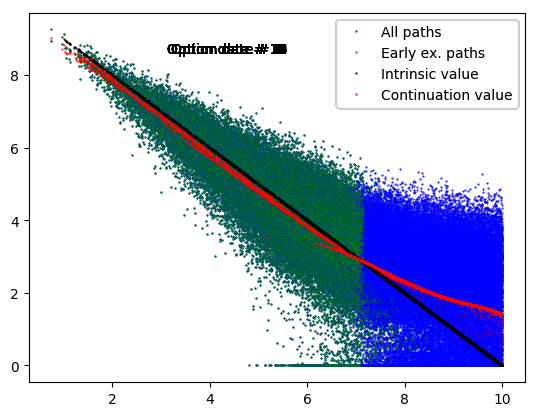

In [38]:

fig, ax = plt.subplots(1)

camera = Camera(fig)

payoff = lambda S: np.maximum(10-S, 0) # Payoff

Payoff = np.zeros((S.shape[0],S.shape[1]-1))

Payoff[:,-1] = payoff(S[:,-1])

S_train = S[0:sims_train, :]

Payoff_train = Payoff[0:sims_train, :]

for i in range(len(opt_times)-2,-1,-1):
  
    clear_output()

    regr_model = FitOptDate(rfr, S_train, Payoff_train, opt_times, i, payoff,10, np.logspace(-10,1,30), ax, camera)

    Update_Payoff(S_train, Payoff_train, i, payoff, regr_model)


In [39]:
animation = camera.animate()

HTML(animation.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

Verde, valor de continuación por debajo de valor de ejercicio ejerces.

Sirve para pintar la frontera de ejercicio, a vto esta frontera coincide con el strike

#Financial application: assessing the exposure of a fund to risk premia factors 

Imagine we are given a mutual fund historical performance together with the evolution of different risk premia factors. Our goal is to assess to what of these factors is the fund exposed.

In [0]:
# We read the data from an excel file:
factor_data = pd.read_excel(PATH + 'Datos Factores.xlsx', index_col = 'Date')

# We calculate the returns for the fund and for the risk premia strategies.
factor_data_ret = factor_data.pct_change().iloc[1:] # cambio desde la fila 1 en adelante

# We perform the analysis in the 2014-2018 period
X = factor_data_ret.loc['2014':'2018'].drop('FONDO', axis = 1)
Y = factor_data_ret.loc['2014':'2018']['FONDO']

In [41]:
factor_data.columns

Index(['EQUITY REVERSAL', '5-10 MEAN REVESERSION', 'TREND RATES INDEX',
       'TREND', 'FX TREND', 'EQUITY TREND', 'COMMODITY TREND',
       'RATES CURVE CARRY', 'RATES CARRY G8', 'FX VALUE G10', 'FX CARRY G10',
       'EQUITY VALUE', 'EQUITY QUALITY', 'EQUITY MULTI-FACTOR',
       'EQUITY MOMENTUM', 'EQUITY LOW VOL', '5-10 MEAN REVESERSION EUROPE',
       'DELTA HEDGE STRANGLE US INDEX', 'DELTA HEDGE STRANGLE EUR INDEX',
       'CURVE CARRY LOW BETA', 'CROSS-ASSET CARRY T6', 'GS COMMOFITY CARRY',
       'COMMODITY CURVE', 'COMMODITY MOMENTUM', 'COMMODITY TREND.1',
       'LONG EQUITY', 'FONDO'],
      dtype='object')

In [50]:
factor_data.head(3)

,EQUITY REVERSAL,5-10 MEAN REVESERSION,TREND RATES INDEX,TREND,FX TREND,EQUITY TREND,COMMODITY TREND,RATES CURVE CARRY,RATES CARRY G8,FX VALUE G10,FX CARRY G10,EQUITY VALUE,EQUITY QUALITY,EQUITY MULTI-FACTOR,EQUITY MOMENTUM,EQUITY LOW VOL,5-10 MEAN REVESERSION EUROPE,DELTA HEDGE STRANGLE US INDEX,DELTA HEDGE STRANGLE EUR INDEX,CURVE CARRY LOW BETA,CROSS-ASSET CARRY T6,GS COMMOFITY CARRY,COMMODITY CURVE,COMMODITY MOMENTUM,COMMODITY TREND.1,LONG EQUITY,FONDO
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-02-05,128.7864,153.7981,78.80,78.15,109.62,93.31,96.43,103.9172,113.2592,97.3657,194.8326,1000.00,1000.00,1000.00,1000.00,1000.00,128.8010,164.91,178.22,113.8706,185.0230,191.9358,147.3963,145.7700,124.6665,374.65,6.88644
2007-02-06,128.8797,153.7021,78.65,78.37,109.80,93.47,96.61,103.9599,113.0222,97.5242,194.6195,1002.60,998.82,1003.38,1003.93,1001.78,128.6527,165.18,178.26,113.8267,185.2734,192.8622,147.3721,146.0234,124.7317,376.04,6.89566
2007-02-07,128.6908,153.4403,78.53,78.59,110.35,93.59,96.68,103.9204,112.9045,97.0048,194.7859,1003.88,996.83,1004.13,1007.10,1002.43,128.1596,165.26,178.61,113.7815,185.0271,192.9522,147.3797,146.2902,124.8767,377.11,6.90664


In [45]:
factor_data_ret.head(2)

,EQUITY REVERSAL,5-10 MEAN REVESERSION,TREND RATES INDEX,TREND,FX TREND,EQUITY TREND,COMMODITY TREND,RATES CURVE CARRY,RATES CARRY G8,FX VALUE G10,FX CARRY G10,EQUITY VALUE,EQUITY QUALITY,EQUITY MULTI-FACTOR,EQUITY MOMENTUM,EQUITY LOW VOL,5-10 MEAN REVESERSION EUROPE,DELTA HEDGE STRANGLE US INDEX,DELTA HEDGE STRANGLE EUR INDEX,CURVE CARRY LOW BETA,CROSS-ASSET CARRY T6,GS COMMOFITY CARRY,COMMODITY CURVE,COMMODITY MOMENTUM,COMMODITY TREND.1,LONG EQUITY,FONDO
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-02-06,0.000724,-0.000624,-0.001904,0.002815,0.001642,0.001715,0.001867,0.000411,-0.002093,0.001628,-0.001094,0.002600,-0.001180,0.003380,0.003930,0.001780,-0.001151,0.001637,0.000224,-0.000386,0.001353,0.004827,-0.000164,0.001738,0.000523,0.003710,0.001339
2007-02-07,-0.001466,-0.001703,-0.001526,0.002807,0.005009,0.001284,0.000725,-0.000380,-0.001041,-0.005326,0.000855,0.001277,-0.001992,0.000747,0.003158,0.000649,-0.003833,0.000484,0.001963,-0.000397,-0.001329,0.000467,0.000052,0.001827,0.001162,0.002845,0.001592


In [52]:
def lasso_ridge_path(X, Y, alphas, regr_option):
    # This function computes the Lasso-Ridge path.
    # By Lasso-Ridge path, we refer to the value of the coefficients
    # as a function of the regularization parameter.
    # X,Y: features and response
    # alphas: array of regularitation parameter
    # regr_option: either Lasso or Ridge

    # We define the steps of the pipeline
    if regr_option == 'Lasso':
        steps = [('scaler', StandardScaler()), ('Regression', Lasso(fit_intercept=True))]
    elif regr_option == 'Ridge':
        steps = [('scaler', StandardScaler()), ('Regression', Ridge(fit_intercept=True))]
  
    pipe = Pipeline(steps)
  
    # We initialize the matrix that will contain the coefficients
    coefs = np.zeros((X.shape[1], len(alphas)))

    # This counter will indicate in what column of coefs should
    # we put the coefficients computed in the for loop
    count = 0

    # We iterate over the array of alphas
    for alpha in alphas: # Itera sobre distintas posible lambdas de la ridge reg
    
        # We change the value of alpha in the regression (either Lasso or Ridge) step
        pipe.named_steps['Regression'].set_params(alpha = alpha)

        # We fit our model
        pipe.fit(X,Y)

        # We introduce the coefficients in the corresponding column of coefs.
        # We divide these coefficients by the scaling factor
        coefs[:,count] =  pipe.named_steps['Regression'].coef_/pipe.named_steps['scaler'].scale_ 

        count += 1
    
    return coefs
# Lo que querremos es la beta, exposicion a cada factor, por lo tanto, hay que desescalar
'''
Para la rergresion ridge, normalizo los datos \n
Para poder interpretar, desnormalizo y obtengo esas betas
'''

'\nPara la rergresion ridge, normalizo los datos \n\nPara poder interpretar, desnormalizo y obtengo esas betas\n'

In [0]:
def plot_lasso_ridge_path(alphas,coef_path, names):
    # This function plots the Ridge-Lasso path with Plotly
    # alphas: array of alpha values
    # coef_path: matrix that contains the coefficients
    # names: names of the different factors

    traces = []

    for i in range(coef_path.shape[0]):

        traces = traces + [go.Scatter(
            x=alphas,
            y=coef_path[i,:],
            name = names[i]
        )]

    data = traces
    layout = go.Layout(
        xaxis=dict(
            type='log',
            autorange=True
        ),
        yaxis=dict(
            #type='log',
            autorange=True
        )
    )

    enable_plotly_in_cell()
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='elevations-3d-surface')



Let's represent the Ridge path (Ridge coefficients as a function of the regularization factor):

In [54]:
# We define the regularizarion parameter array
alphas = np.logspace(-2,6,100)

# Names are the columns of our dataframe
names = factor_data_ret.drop('FONDO', axis = 1).columns

# We compute the Ridge path
coef_path = lasso_ridge_path(X, Y, alphas, 'Ridge')

# We plot it
plot_lasso_ridge_path(alphas, coef_path, names)

Output hidden; open in https://colab.research.google.com to view.

El grafico representa las $\beta$ con respecto a $\lambda$, en escala logaritmica!

Notice that coefficients schrink to $0$ as $\lambda\to \infty$ (sorry, in Scikit Learn the regularization parameter is called $\alpha$).

We could find the optimum $\lambda$ through cross validation.

Notice that, contrary to what happens when we perform feature selection, we end up with every feature no matter the value of $\lambda$. This is a drawback if our target is model interpretability instead of model accuracy.

# Lasso regression

Lasso regression is similar to Ridge regression, but the regularizaton term is different:

$$J(\beta)=\frac{1}{n}\sum_{j=1}^n\left(y_j-\tilde{y}_j\right)^2 + \frac{\lambda}{n}\sum_{j=1}^p\left|\beta_j\right|$$

The fact that we have the absolute value function instead of the square function in the regularization term, makes the Lasso model different from the Ridge model. Under the Ridge model, coefficients vanished asymptotically as $\lambda \to \infty$, whereas under Lasso the absolute value function forces the coefficients to be exactly $0$ as we incresase $\lambda$. Some of these coefficients will go to $0$ before others.

Therefore, Lasso produces simpler and more interpretable models than Ridge.

Contrary to what happens in linear and Ridge regressions, there is not a closed form formula to find the optimum parameters. Hence, numerical optimization methods are used.

In [59]:
# We import the Lasso model
from sklearn.linear_model import Lasso

# We define the alpha array
alphas = np.logspace(-6,-3,100)

# Names are the columns of our dataframe
names = factor_data_ret.drop('FONDO', axis = 1).columns

# We compute the Lasso path
coef_path = lasso_ridge_path(X, Y, alphas, 'Lasso')

# We plot it
plot_lasso_ridge_path(alphas,coef_path, names)


Output hidden; open in https://colab.research.google.com to view.

En este caso, vemos como se compara lo mismo, las $\beta$ con respecto a la $\lambda$ y vemos que en este caso hay $\beta$ que tienden a cero muy rapido, es decir a no ser utiles para explicar.

In [0]:
#%%time

window = 260

betas = np.zeros((factor_data_ret.shape[1]-1,factor_data_ret.shape[0]-window+1))
#corrs = np.zeros((factor_data_ret.shape[1]-1,factor_data_ret.shape[0]-window))

for i in range(window, factor_data_ret.shape[0]):
  
    tscv = TimeSeriesSplit(n_splits=5)

    model = LassoCV(cv=5, verbose = 0, max_iter = 10000, random_state=1)

    X = factor_data_ret.iloc[i-window:i+1].drop('FONDO', axis = 1)
    Y = factor_data_ret.iloc[i-window:i+1]['FONDO']

    scaler = StandardScaler()

    X_norm = scaler.fit_transform(X)

    model.fit(X_norm,Y)

    betas[:,i] = model.coef_/scaler.scale_ 

    if i%100 == 0:
        clear_output()
        print(factor_data_ret.index[i]) 


#

In [0]:

traces = []

for i in range(betas.shape[0]):
  
  traces = traces + [go.Scatter(
      x=factor_data_ret.index[window:],
      y=betas[i,:],
      name = factor_data_ret.drop('FONDO', axis = 1).columns[i]
    )]

  data = traces
  layout = go.Layout(
      xaxis=dict(
          #type='log',
          autorange=True
      ),
      yaxis=dict(
          #type='log',
          autorange=True
      )
  )

enable_plotly_in_cell()
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='elevations-3d-surface')


# Financial application: CDS spread fitting

In this exercise we are going to use Markit data for CDS quotes. Given tier, sector, region and rating, we will try to predict the clean spread of a 5 year (most liquid maturity) CDS. By clean spread we mean the following:

$$S_{\text{clean}}=\frac{S}{1-Rec}$$

Where $S$ is the 5yr CDS spread and $Rec$ the implied recovery rate.

This prediction could we used in the CVA space, where we have thousands of counterparties with no liquid CDS available.

In [60]:
# We read the data
CDS_data = pd.read_csv(PATH + 'CDS_data.csv')

# We print the data columns
print(CDS_data.columns)

Index(['Date', 'Ticker', 'ShortName', 'RedCode', 'Tier', 'Ccy', 'DocClause',
       'Contributor', 'Spread6m', 'Spread1y', 'Spread2y', 'Spread3y',
       'Spread5y', 'Spread7y', 'Spread10y', 'Spread15y', 'Spread20y',
       'Spread30y', 'Recovery', 'CompositeDepth5y', 'Sector', 'Region',
       'AvRating', 'ImpliedRating', 'CompositeLevel6m', 'CompositeLevel1y',
       'CompositeLevel2y', 'CompositeLevel3y', 'CompositeLevel5y',
       'CompositeLevel7y', 'CompositeLevel10y', 'CompositeLevel15y',
       'CompositeLevel20y', 'CompositeLevel30y', 'CompositeLevelRecovery'],
      dtype='object')


In [61]:
# We are just interested in the columns that we are using as features 
# and the one we want to predict
CDS_data = CDS_data[['Tier', 'Sector', 'Region','AvRating', 'Spread5y', 'Recovery']] 

# We print the original length of the dataframe
print('Original dataframe length:', len(CDS_data))

# We get rid of rows with no rating or no 5yr spread. 
CDS_data.dropna(subset = ['Spread5y', 'AvRating'], inplace = True)

# For the remaining columns, we fill NAs with 'Unkown' keyword
CDS_data.fillna('Unknown', inplace=True)

# In the Sector column, there are some examples marked as 'Unclassified'.
# We change it to 'Unkown'
CDS_data.loc[CDS_data['Sector'] == 'Unclassified','Sector'] = 'Unknown'

# We convert both the CDS spread and the implied recovery rate to float
CDS_data['Spread5y'] = CDS_data['Spread5y'].str.rstrip('%').astype('float') / 100.0
CDS_data['Recovery'] = CDS_data['Recovery'].str.rstrip('%').astype('float') / 100.0

# We get rid of defaulted names
CDS_data = CDS_data[CDS_data['AvRating']!='D']

# We add the clean spread column
CDS_data['Clean Spd'] = CDS_data['Spread5y'] / (1-CDS_data['Recovery'])

# We print the length of the dataframe we are working with
print('NA filtered dataframe length:', len(CDS_data))



Original dataframe length: 2529
NA filtered dataframe length: 2037


In [62]:
# Notice that the features that we are using are all categorical.
# Let's print their unique values and their ocurrence

print('----------Tier------------------------------------')
print(CDS_data['Tier'].value_counts())
print('----------Sector----------------------------------')
print(CDS_data['Sector'].value_counts())
print('----------Region----------------------------------')
print(CDS_data['Region'].value_counts())
print('----------AvRating--------------------------------')
print(CDS_data['AvRating'].value_counts())

----------Tier------------------------------------
SNRFOR    1694
SUBLT2     249
SECDOM      87
SNRLAC       7
Name: Tier, dtype: int64
----------Sector----------------------------------
Unknown                          604
Financial                        475
Industrial                       161
Consumer Cyclical                142
Communications and Technology    130
Consumer Stable                  128
Utilities                        121
Government                       106
Energy                            87
Materials                         83
Name: Sector, dtype: int64
----------Region----------------------------------
N.Amer        835
Europe        656
Asia          266
Lat.Amer       56
MiddleEast     54
Oceania        52
E.Eur          49
India          19
OffShore       19
Africa         18
Supra           8
Caribbean       5
Name: Region, dtype: int64
----------AvRating--------------------------------
BBB    771
A      561
BB     297
B      194
AA     153
CCC     36
AAA  

We plot histograms of clean spread for different ratings.

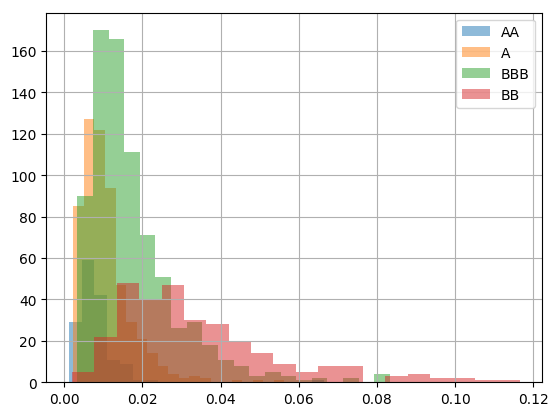

In [63]:
f, ax = plt.subplots(1)



CDS_data[CDS_data.AvRating=='AA']['Clean Spd'].hist(bins = 20, ax = ax, alpha = 0.5, label = 'AA')
CDS_data[CDS_data.AvRating=='A']['Clean Spd'].hist(bins = 20, ax = ax, alpha = 0.5,label = 'A')
CDS_data[CDS_data.AvRating=='BBB']['Clean Spd'].hist(bins = 20, ax = ax, alpha = 0.5,label = 'BBB')
CDS_data[CDS_data.AvRating=='BB']['Clean Spd'].hist(bins = 20, ax = ax, alpha = 0.5, label = 'BB')

ax.legend();

# Categorical features: one hot encoding

Para trabajar con variables categoricas

When we have features that are categorical, in general terms it would not be correct to map them to integer of float variables per feature.

Imagine that we had a feature representing a colour with 3 posible values {red, green, blue}. A naive idea would be to do the following mapping:

red$\to$1; green$\to$2; blue$\to$3

By doing so, we would be establishing a non-real relationship among the different colours (is green greater than red?)

In categories that can, somehow, be sorted it still would not be recommended. Going back to the rating example:

AAA$\to$1; AA$\to$2; A$\to$3

In the $AA$ rating two times the $A$ rating?

The right way to treat a categorical feature $C$ with $n$ posible values $\{C_1,\ldots,C_n\}$ is to generate $n$ one hot features $\{OH_1,\ldots,OH_n\}$ associated to each one of the posible values, such that

$$OH_j=1_{\{C=C_j\}}$$

Notice that 

$$OH_n=1-\sum_{j=1}^{n-1}OH_j$$

This would be a problem if we used linear regression (due to multicollinearity of the features). In that case, we can leave out one of the possible values and only work with $n-1$ one hot features. 

Multicollinearity will not be a problem if we use regularization.

There is a one  [hot encoder transformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) in Sklearn.

In [0]:
# Import one hot encoding
from sklearn.preprocessing import OneHotEncoder

# Test one hot encoder
onehot = OneHotEncoder(sparse=False, categories = [['AAA', 'AA', 'A','BBB', 'BB', 'B','CCC', 'D']], handle_unknown = 'error')

XXX = onehot.fit_transform(np.array(CDS_data[['AvRating']]).reshape(-1,1))

Aquí se ve como funciona el OHE que asígna 1 o 0 para cada categoria, crea una matriz de ocho columnas, cada una de ellas se corresponde con las categorias existentes, como vamos a aplicar una regresion ridge o lasso (es decir con funcion objetivo regularizante) se pueden usar todas las categorias, si no, habria que usar n-1 categorias - No se como se haria

In [65]:
print(XXX[0:20,:]) 

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


In [66]:
onehot.transform([['B']])

onehot.inverse_transform([[0., 0., 0., 0., 0., 1., 0., 0.]])

array([['B']], dtype=object)

Let's fit a Ridge regression model to the CDS dataset. Since the CDS spread is a non negative variable and since we might accept a greater error for greater spreads, we log transform variable Y. 

Best param found:  {'Ridge__alpha': 0.49770235643321137}


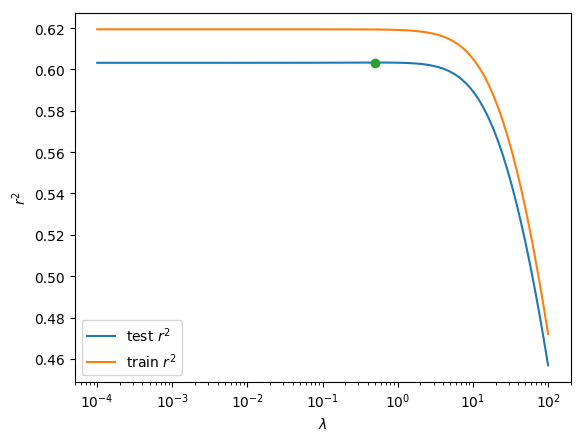

In [67]:
# We impose the categories order, although it can be done automatically
categories = [['SNRFOR','SUBLT2','SECDOM','SNRLAC'], 
              ["Unknown", "Financial", "Industrial", "Consumer Cyclical", 
               "Communications and Technology", "Consumer Stable", "Utilities", 
               "Government", "Energy", "Materials"], 
              ["N.Amer","Europe","Asia","Lat.Amer","MiddleEast","Oceania",
               "E.Eur","India","OffShore","Africa","Supra","Caribbean"],
              ['AAA','AA','A','BBB','BB','B','CCC']]

# We define the pipeline steps
steps = [('OneHot', OneHotEncoder(sparse=False, categories = categories, handle_unknown  = 'error')),
         ('Ridge', Ridge(fit_intercept=True, alpha = 10))]

# Pipeline is defined
pipeline = Pipeline(steps)
          
# Grid of hyperparams
parameteres = {'Ridge__alpha': np.logspace(-4,2,100)}

# Grid search is defined. Here we do 5-fold cv
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, verbose = 0, refit=True, 
                    scoring= 'r2', return_train_score = True)

# We fill X & Y
X = CDS_data[['Tier', 'Sector','Region','AvRating']]
Y = np.log(CDS_data['Clean Spd'])  

# We shuffle the data
X, Y = shuffle(X,Y)
          
# We use the grid as if it was a model
grid.fit(X,Y);

# We plot the score bor both train and test
plt.plot(np.logspace(-4,2,100), grid.cv_results_['mean_test_score'], label = 'test ' + r'$r^2$')
plt.plot(np.logspace(-4,2,100), grid.cv_results_['mean_train_score'], label = 'train ' r'$r^2$')

# We plot the best model
plt.plot(grid.best_params_['Ridge__alpha'], grid.best_score_,'o')

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$r^2$')

plt.xscale('log')

plt.legend();

print('Best param found: ', grid.best_params_)

El $r^2$ es el $r^2$ que hay entre el valor del spread y el valor que me predice el modelo del spread \
$r^{2}$ mas alto, es mejor - Pero hay peligro con el overfit! \

Estamos trabajando con un 5-fold 

In [0]:
#@title CDS Spread Prediction { run: "auto" }
Type1 = "SNRFOR" #@param ["SNRFOR", "SUBLT2", "SECDOM", "SNRLAC"]
Sector1 = "Financial" #@param ["Unknown", "Financial", "Industrial", "Consumer Cyclical", "Communications and Technology", "Consumer Stable", "Utilities", "Government", "Energy", "Materials"] 
Region1 = "Europe" #@param ["N.Amer","Europe","Asia","Lat.Amer","MiddleEast","Oceania","E.Eur","India","OffShore","Africa","Supra","Caribbean"] 

Type2 = "SUBLT2" #@param ["SNRFOR", "SUBLT2", "SECDOM", "SNRLAC"]
Sector2 = "Financial" #@param ["Unknown", "Financial", "Industrial", "Consumer Cyclical", "Communications and Technology", "Consumer Stable", "Utilities", "Government", "Energy", "Materials"] 
Region2 = "Europe" #@param ["N.Amer","Europe","Asia","Lat.Amer","MiddleEast","Oceania","E.Eur","India","OffShore","Africa","Supra","Caribbean"] 

rating = np.array([['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC']]).T

data1 = np.array([[Type1,Sector1,Region1]])
data1 = np.repeat(data1,7, axis = 0)
data1 = np.concatenate((data1, rating), axis = 1)
data1 = pd.DataFrame(data1)

data2 = np.array([[Type2,Sector2,Region2]])
data2 = np.repeat(data2,7, axis = 0)
data2 = np.concatenate((data2, rating), axis = 1)
data2 = pd.DataFrame(data2)


f, ax = plt.subplots(1)

ax.bar(x = np.arange(0,data1.shape[0])-0.2,
       height =np.exp(grid.predict(data1)), width = 0.4, 
       label = 'Data 1')


ax.bar(x = np.arange(0,data2.shape[0])+0.2,
       height =np.exp(grid.predict(data2)), width = 0.4,
      label = 'Data 2')


ax.set_xticks(np.arange(0,data1.shape[0]))

ax.set_xticklabels(['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC']);
ax.legend();
#ax.set_yscale('log')


In [69]:
#@title Prueba { run: "auto" }
a = 76 #@param {type:"slider", min:0, max:100, step:1}

print(a)


76
